In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
airport_data = pd.read_csv('data/airports-database.csv')

In [40]:
airport_data.head().T

,0,1,2,3,4
id,0,1,2,3,4
year,2013,2013,2013,2013,2013
month,1,1,1,1,1
day,1,1,1,1,1
dep_time,517.0,533.0,542.0,544.0,554.0
sched_dep_time,515,529,540,545,600
dep_delay,2.0,4.0,2.0,-1.0,-6.0
arr_time,830.0,850.0,923.0,1004.0,812.0
sched_arr_time,819,830,850,1022,837
arr_delay,11.0,20.0,33.0,-18.0,-25.0


In [41]:
# Voos cancelados: todos que NUNCA DECOLARAM e que NUNCA POUSARAM
airport_data['cancelled'] = ((airport_data['dep_time'].isna()) & (airport_data['arr_time'].isna())).astype(int)

In [62]:
# Voos desviados: todos que DECOLARAM mas NUNCA POUSARAM (no lugar previsto)
airport_data['diverted'] = ((airport_data['cancelled'] == 0) & (airport_data['arr_time'].isna())).astype(int)

In [68]:
# Voos finalizados: todos os que DECOLARAM e POUSARAM no lugar previsto
airport_data['landed'] = ((airport_data['dep_time'].notna()) & (airport_data['arr_time'].notna())).astype(int)

In [69]:
airport_data.tail().T

,336771,336772,336773,336774,336775
id,336771,336772,336773,336774,336775
year,2013,2013,2013,2013,2013
month,9,9,9,9,9
day,30,30,30,30,30
dep_time,NaN,NaN,NaN,NaN,NaN
sched_dep_time,1455,2200,1210,1159,840
dep_delay,NaN,NaN,NaN,NaN,NaN
arr_time,NaN,NaN,NaN,NaN,NaN
sched_arr_time,1634,2312,1330,1344,1020
arr_delay,NaN,NaN,NaN,NaN,NaN


In [85]:
print('Voos cancelados: {}'.format(airport_data['cancelled'].sum()))
print('Voos desviados: {}'.format(airport_data['diverted'].sum()))
print('Voos concluídos: {}'.format(airport_data['landed'].sum()))

print('\nTotal de voos: {}'.format(airport_data['cancelled'].sum() + airport_data['diverted'].sum() + airport_data['landed'].sum()))
print('Tamanho total do dataset: {}'.format(len(airport_data)))

Voos cancelados: 8255
Voos desviados: 458
Voos concluídos: 328063

Total de voos: 336776
Tamanho total do dataset: 336776


In [91]:
airport_data[airport_data['landed'] == 1]['dep_delay'].mean()

12.575974736559747

In [99]:
# airport_data[airport_data['landed'] == 1].groupby('dest').size().sort_values(ascending=False)
airport_data[airport_data['landed'] == 1]['dest'].value_counts()

dest
ATL    16873
ORD    16607
LAX    16058
BOS    15028
MCO    13979
       ...  
HDN       14
MTJ       14
SBN       10
ANC        8
LEX        1
Name: count, Length: 104, dtype: int64

In [110]:
# Cria uma tupla contendo (Origem, Destino) e conta as 5 que mais ocorrem
airport_data['route'] = airport_data.apply(lambda row: (row['origin'], row['dest']), axis=1)
airport_data['route'].value_counts().head(5)

route
(JFK, LAX)    11262
(LGA, ATL)    10263
(LGA, ORD)     8857
(JFK, SFO)     8204
(LGA, CLT)     6168
Name: count, dtype: int64

Text(0, 0.5, 'Quantidade')

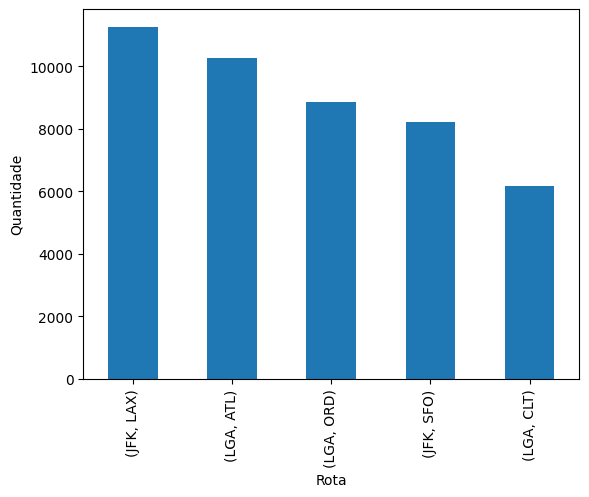

In [109]:
airport_data['route'].value_counts().head(5).plot(kind='bar')
plt.xlabel('Rota')
plt.ylabel('Quantidade')

In [114]:
airport_data['name'].unique()

array(['United Air Lines Inc.', 'American Airlines Inc.',
       'JetBlue Airways', 'Delta Air Lines Inc.',
       'ExpressJet Airlines Inc.', 'Envoy Air', 'US Airways Inc.',
       'Southwest Airlines Co.', 'Virgin America',
       'AirTran Airways Corporation', 'Alaska Airlines Inc.',
       'Endeavor Air Inc.', 'Frontier Airlines Inc.',
       'Hawaiian Airlines Inc.', 'Mesa Airlines Inc.',
       'SkyWest Airlines Inc.'], dtype=object)

In [120]:
airport_data[airport_data['landed'] == 1].groupby('name')['arr_delay'].mean().sort_values(ascending=False)

name
Frontier Airlines Inc.         21.920705
AirTran Airways Corporation    20.115906
ExpressJet Airlines Inc.       15.796431
Mesa Airlines Inc.             15.556985
SkyWest Airlines Inc.          11.931034
Envoy Air                      10.774733
Southwest Airlines Co.          9.649120
JetBlue Airways                 9.457973
Endeavor Air Inc.               7.379669
United Air Lines Inc.           3.558011
US Airways Inc.                 2.129595
Virgin America                  1.764464
Delta Air Lines Inc.            1.644341
American Airlines Inc.          0.364291
Hawaiian Airlines Inc.         -6.915205
Alaska Airlines Inc.           -9.930889
Name: arr_delay, dtype: float64

In [131]:
airport_data['time_hour'] = pd.to_datetime(airport_data['time_hour'])

In [134]:
airport_data[airport_data['landed'] == 1]['time_hour'].dt.day_name().value_counts()

time_hour
Monday       49398
Tuesday      49223
Wednesday    48753
Friday       48642
Thursday     48568
Sunday       45583
Saturday     37896
Name: count, dtype: int64